# Variational Autoencoder: VAE

In this notebook we explore the using of VAEs for anomaly detection. For this purpose, we will use the following procedure:

1. We use the train set for the training process. We use a non-contaminated version of the public test set for validation (to decide early stopping and avoid the overfitting over the training set).
2. The performance of the model was measured over the private test set.


TODO: 
1. Check if the performance improves when using QuantileTransform instead of MinMaxScaler.
2. Check if the performance improves when using only curves with more than 20 detections in both bands.
3. Check if the performance improves when more importance to the most important features of the Supervised RF-Detector is given.

In [1]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score

import torch
from torch.utils import data
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.nn import functional as F

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from barbar import Bar

from preprocess import get_ALeRCE_data
from vae.train import TrainerVAE
from vae.test import eval

In [2]:
class Args:
    batch_size = 128
    num_epochs = 1000
    lr = 5e-5
    patience = 100
    lr_milestones = [250, 500]
    latent_dim=32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training

dataloader_train, scaler, classes = get_ALeRCE_data(args.batch_size, 'train', mode='train')
dataloader_val, _, _ = get_ALeRCE_data(args.batch_size, 'val', mode='test', scaler=scaler)

## Training

In [3]:
vae = TrainerVAE(args, dataloader_train, dataloader_val, device)
vae.train()

27058/27058: [===============================>] - ETA 0.8sss
Training VAE... Epoch: 0, Loss: 61.717
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 0, Loss: 0.0582
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 1, Loss: 53.368
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 1, Loss: 0.0514
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 2, Loss: 49.060
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 2, Loss: 0.048
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 3, Loss: 45.060
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 3, Loss: 0.043
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 4, Loss: 40.027
4741/4741: [===============================>] - ETA 0.0s
Testing VAE..

27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 39, Loss: 18.134
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 39, Loss: 0.0198
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 40, Loss: 17.928
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 40, Loss: 0.0195
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 41, Loss: 17.656
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 41, Loss: 0.0194
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 42, Loss: 17.372
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 42, Loss: 0.0191
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 43, Loss: 17.175
4741/4741: [===============================>] - ETA 0.0s
Test

4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 78, Loss: 0.0161
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 79, Loss: 12.962
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 79, Loss: 0.0162
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 80, Loss: 12.842
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 80, Loss: 0.0161
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 81, Loss: 12.863
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 81, Loss: 0.0161
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 82, Loss: 12.750
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 82, Loss: 0.0161
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Train

27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 119, Loss: 11.353
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 119, Loss: 0.0153
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 120, Loss: 11.436
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 120, Loss: 0.0153
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 121, Loss: 11.367
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 121, Loss: 0.0152
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 122, Loss: 11.347
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 122, Loss: 0.0152
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 123, Loss: 11.182
4741/4741: [===============================>] - ETA 

27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 159, Loss: 10.347
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 159, Loss: 0.0144
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 160, Loss: 10.345
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 160, Loss: 0.0144
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 161, Loss: 10.427
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 161, Loss: 0.0145
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 162, Loss: 10.294
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 162, Loss: 0.0144
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 163, Loss: 10.303
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 163, Loss: 0.0144


27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 200, Loss: 9.891
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 200, Loss: 0.0142
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 201, Loss: 9.919
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 201, Loss: 0.0142
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 202, Loss: 9.798
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 202, Loss: 0.0142
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 203, Loss: 9.841
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 203, Loss: 0.0142
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 204, Loss: 9.899
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 204, Loss: 0.0142
27058

27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 241, Loss: 9.416
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 241, Loss: 0.014
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 242, Loss: 9.558
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 242, Loss: 0.014
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 243, Loss: 9.526
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 243, Loss: 0.014
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 244, Loss: 9.553
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 244, Loss: 0.0141
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 245, Loss: 9.533
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 245, Loss: 0.014
27058/27058: [==========

4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 282, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 283, Loss: 9.346
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 283, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 284, Loss: 9.318
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 284, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 285, Loss: 9.219
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 285, Loss: 0.0139
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 286, Loss: 9.291
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 286, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 287, Loss: 9.358
4741/

27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 324, Loss: 9.257
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 324, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 325, Loss: 9.184
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 325, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 326, Loss: 9.320
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 326, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 327, Loss: 9.314
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 327, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 328, Loss: 9.302
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 328, Loss: 0.0139
27058/27058: [======

27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 366, Loss: 9.255
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 366, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 367, Loss: 9.257
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 367, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 368, Loss: 9.226
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 368, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 369, Loss: 9.345
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 369, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 370, Loss: 9.179
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 370, Loss: 0.0139
27058/27058: [======

27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 408, Loss: 9.199
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 408, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 409, Loss: 9.202
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 409, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 410, Loss: 9.133
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 410, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 411, Loss: 9.136
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 411, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 412, Loss: 9.159
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 412, Loss: 0.0139
27058/27058: [======

4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 449, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 450, Loss: 9.137
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 450, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 451, Loss: 9.216
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 451, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 452, Loss: 9.157
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 452, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 453, Loss: 9.151
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 453, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 454, Loss: 9.161
4741/4741: [========

4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 491, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 492, Loss: 9.200
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 492, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 493, Loss: 9.148
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 493, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 494, Loss: 9.175
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 494, Loss: 0.014
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 495, Loss: 9.148
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 495, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 496, Loss: 9.110
4741/4741: [=========

27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 533, Loss: 9.264
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 533, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 534, Loss: 9.191
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 534, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 535, Loss: 9.135
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 535, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 536, Loss: 9.115
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 536, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 537, Loss: 9.036
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 537, Loss: 0.0138
27058/27058: [======

4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 574, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 575, Loss: 9.064
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 575, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 576, Loss: 9.174
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 576, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 577, Loss: 9.059
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 577, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 578, Loss: 9.160
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 578, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 579, Loss: 9.149
4741/4741: [========

4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 616, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 617, Loss: 9.103
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 617, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 618, Loss: 9.089
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 618, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 619, Loss: 9.108
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 619, Loss: 0.0138
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 620, Loss: 9.100
4741/4741: [===============================>] - ETA 0.0s
Testing VAE... Epoch: 620, Loss: 0.0139
27058/27058: [===============================>] - ETA 0.0s
Training VAE... Epoch: 621, Loss: 9.046
4741/4741: [========

## Learning curve

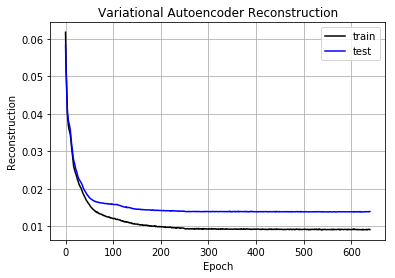

In [11]:
def plot_loss(values, values_t, metric):
    plt.plot(np.arange(len(values)), values, c='k', label='train')
    plt.plot(np.arange(len(values_t)), values_t, c='b', label='test')
    plt.title('Variational Autoencoder {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)

plot_loss(np.array(vae.reconst)/1000, np.array(vae.reconst_t), 'Reconstruction')

## Evaluation

In [5]:
dataloader_test, _, _ = get_ALeRCE_data(args.batch_size, 'test', mode='test',scaler=scaler)
labels1, labels2, scores, latents = eval(vae.model, dataloader_test, device)

Testing...
ROC AUC score: 0.671


In [6]:
x_embedded = TSNE(n_components=2).fit_transform(latents)

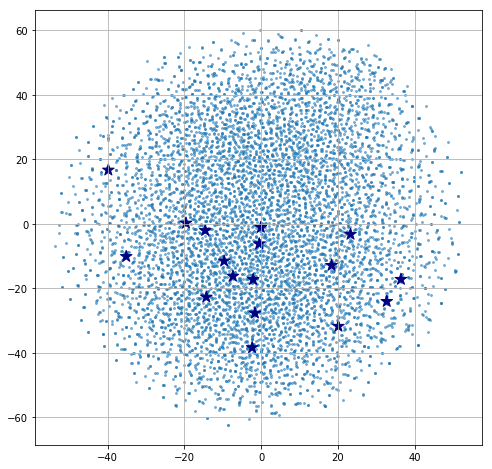

In [7]:
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('jet', 4)
plt.scatter(x_embedded[:, 0][labels2==0], x_embedded[:, 1][labels2==0],
            s=15, alpha=0.5, marker='.')
plt.scatter(x_embedded[:, 0][labels2!=0], x_embedded[:, 1][labels2!=0], 
            c=labels2[labels2!=0].reshape(-1,),
            s=150, cmap=cmap, marker='*')

plt.grid(True)

In [8]:
scores_in = scores[labels1==0]
scores_out = scores[labels1==1]

scores_ELL = scores[labels2==1]
scores_TDE = scores[labels2==2]
scores_SNIIb = scores[labels2==3]
scores_WRayot = scores[labels2==4]

(array([0.81713014, 0.        , 0.        , 0.81713014, 0.        ,
        0.        , 0.        , 0.81713048, 3.26851922, 2.45139144,
        1.63425961, 0.        , 0.8171298 , 0.        , 0.        ,
        0.8171298 , 0.        , 0.81713116, 0.8171298 , 0.8171298 ]),
 array([0.26570255, 0.3376905 , 0.40967846, 0.48166642, 0.5536544 ,
        0.62564236, 0.6976303 , 0.7696183 , 0.8416062 , 0.9135942 ,
        0.9855821 , 1.0575701 , 1.1295581 , 1.2015461 , 1.2735339 ,
        1.3455219 , 1.4175099 , 1.4894979 , 1.5614858 , 1.6334738 ,
        1.7054617 ], dtype=float32),
 <a list of 20 Patch objects>)

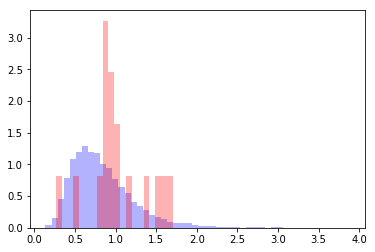

In [9]:
plt.hist(scores_in[scores_in<20], bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=20, color='r', alpha=0.3, density=True, label='Outlier')

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


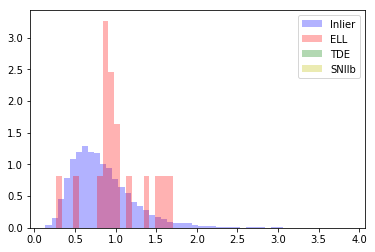

In [10]:
plt.hist(scores_in[scores_in<20], bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_ELL, bins=20, color='r', alpha=0.3, density=True, label='ELL')
plt.hist(scores_TDE, bins=1, color='g', alpha=0.3, density=True, label='TDE')
plt.hist(scores_SNIIb, bins=20, color='y', alpha=0.3, density=True, label='SNIIb')
#plt.hist(scores_WRayot, bins=1, color='k', alpha=0.3, density=True, label='WRayot')
plt.legend()
